## 18.1 Feature Interactions
In machine learning, understanding the interactions between features can be crucial for building accurate models. Imagine a chef creating a recipe: each ingredient has its own unique flavor, but when combined with other ingredients, new and complex flavors can emerge. Similarly, in a machine learning model, the relationship between two features can change the prediction in ways that cannot be captured by considering each feature individually.

For example, consider a linear regression model that predicts the price of a house based on its size and location. The model might include an interaction term between size and location, represented by the formula: $price = a * size + b * location + c * size * location$. This interaction term captures the idea that the effect of size on price might depend on location: in some locations, larger houses might command a higher premium than in others.

In decision trees, feature interactions are represented differently. A feature $X_1$ interacts with another feature $X2$ if $X2$ is used differently in different paths of the tree. In other words, the effect of $X1$ on the prediction depends on the value of $X2$. For example, imagine a decision tree that predicts whether someone will enjoy a movie based on its genre and runtime. The tree might split first on genre, then on runtime for certain genres. This would indicate an interaction between genre and runtime: the effect of runtime on enjoyment depends on the genre of the movie.

Feature interactions occur when the effect of one feature on the prediction depends on the value of another feature. In other words, the change in the prediction that occurs by varying one feature also depends on the value of another feature. This can be represented in a formula when using linear or logistic regression by creating a new column that multiplies two features together. In decision trees, interaction occurs when one feature is used differently in different paths of the tree, and both features combined impact the result.

Feature interactions can be important for improving the accuracy of machine learning models, particularly in recommendation systems and click-through rate predictions. By learning sophisticated feature interactions, deep learning methods can achieve state-of-the-art results in an end-to-end manner.

If we created a formula thet represents a linear or logistic regression model that includes an interaction term between two features, $X_1 \text{ and }X_2$. The formula is: $y = aX_1 + bX_2 + cX_1X_2$.

In this formula, $y$ represents the predicted value of the dependent variable, which could be a continuous value in the case of linear regression or a probability in the case of logistic regression. $X_1 \text{ and }X_2$ represent two independent variables or features that are used to make the prediction.

The coefficients $a, b,\text{ and }c$ represent the _weights_ assigned to each term in the formula. The coefficient $a$ represents the effect of $X_1 \text{ on }y \text{ when }X_2$ is held constant, while the coefficient $b$ represents the effect of $X_2\text{ on }y\text{ when }X_1$ is held constant. The coefficient c represents the interaction effect between $X_1\text{ and }X2\text{ on }y$.

The interaction term, $cX_1X_2$, is created by multiplying the two features together. This term captures the idea that the effect of one feature on $y$ depends on the value of another feature. In other words, the change in $y$ that occurs by varying one feature also depends on the value of another feature.

Overall, this formula represents a model that includes both main effects (the effects of each feature individually) and an interaction effect (the combined effect of two features) on the dependent variable $y$.

## 18.2 xgbfir
The xgbfir library can be used to find the top feature interactions in an XGBoost model. To use this library, you need to install both xgbfir and the openpyxl library, which is used to read Excel files. 

In [1]:
import dtreeviz
from feature_engine import encoding, imputation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import base, compose, datasets, ensemble, metrics, model_selection, pipeline, preprocessing, tree
import scikitplot
import xgboost as xgb
import yellowbrick.model_selection as ms
from yellowbrick import classifier
import urllib
import zipfile
from hyperopt import fmin, tpe, hp, Trials
from EffectiveXGBoost import *

import xgbfir

In [2]:
path_url = 'https://github.com/mattharrison/datasets/raw/master/data/kaggle-survey-2018.zip'
file_name = 'kaggle-survey-2018.zip'
dataset = 'multipleChoiceResponses.csv'

raw = extract_dataset(path_url, file_name, dataset)

# Create raw X and raw y
kag_X, kag_y = prepX_y(raw, 'Q6')

# Split data
kag_X_train, kag_X_test, kag_y_train, kag_y_test = (model_selection
                                                    .train_test_split(kag_X, 
                                                                      kag_y, 
                                                                      test_size=.3, 
                                                                      random_state=42, 
                                                                      stratify=kag_y)
                                                   )


# Transform X with pipeline
pline = pipeline.Pipeline(
    [('tweak', PrepDataTransformer()),
    ('cat', encoding.OneHotEncoder(top_categories=5, drop_last=True,
    variables=['Q1', 'Q3', 'major'])),
    ('num_impute', imputation.MeanMedianImputer(imputation_method='median',
                variables=['education', 'years_exp']))]
    )

X_train = pline.fit_transform(kag_X_train)
X_test = pline.transform(kag_X_test)

# Transform y with label encoder
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(kag_y_train)
y_train = label_encoder.transform(kag_y_train)
y_test = label_encoder.transform(kag_y_test)

# Combined Data for cross validation/etc
X = pd.concat([X_train, X_test], axis='index')
y = pd.Series([*y_train, *y_test], index=X.index)

# Default training
xg = xgb.XGBClassifier()
xg.fit(X_train, y_train)

G:\My Drive\SisengAI\AlgorithmicTrading\code_rebuilding\MattHarrison\EffectiveXGBoost\EffectiveXGBoost_MyTake\EffectiveXGBoost.py:62: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

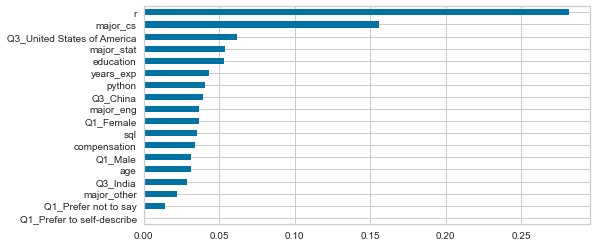

In [4]:
xgb_def = xgb.XGBClassifier()
xgb_def.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(8, 4))

_=(pd.Series(xgb_def.feature_importances_, index=X_train.columns)
.sort_values()
.plot.barh(ax=ax)
)

In [7]:
xgbfir.saveXgbFI(xgb_def, feature_names=X_train.columns, OutputXlsxFile='fir.xlsx')
fir = pd.read_excel('fir.xlsx')
print(fir
 .sort_values(by='Average Rank')
 .head()
 .round(1)
)

    Interaction   Gain  FScore  wFScore  Average wFScore  Average Gain  \
2             r  517.8      84     34.2              0.4           6.2   
0     years_exp  597.0     627     88.2              0.1           1.0   
5     education  296.0     254     76.7              0.3           1.2   
1  compensation  518.5     702    123.0              0.2           0.7   
4      major_cs  327.1      96     16.1              0.2           3.4   

   Expected Gain  Gain Rank  FScore Rank  wFScore Rank  Avg wFScore Rank  \
2          479.4          3            8             5                 2   
0           87.9          1            2             3                12   
5           83.7          6            4             4                 4   
1           59.7          2            1             1                 8   
4          174.7          5            7             8                 9   

   Avg Gain Rank  Expected Gain Rank  Average Rank  Average Tree Index  \
2              1        

Here is an explanation of the terms we see in the output above:

- **Gain**: This represents the improvement in accuracy brought by a feature to the branches on which it is used. It is calculated by taking the difference between the weighted impurity of the parent node and the sum of the weighted impurities of its child nodes.

- **FScore**: This represents the number of times a feature is used to split the data in the tree structure of an XGBoost model.

- **wFScore**: This represents the FScore weighted by the number of instances (samples) affected by the split.

- **Average wFScore**: This represents the average wFScore for a feature, calculated by dividing the total wFScore for that feature by its FScore.

- **Average Gain**: This represents the average gain for a feature, calculated by dividing the total gain for that feature by its FScore.

- **Expected Gain**: This represents an estimate of the expected gain for a feature, calculated by multiplying its Average Gain by its Average wFScore.

These values provide insight into the importance and impact of individual features in an XGBoost model, and can be used to guide feature selection and model interpretation.

The xgbfir library is used to find the top feature interactions in an XGBoost model. After running the saveXgbFI function, the library generates an Excel file with multiple sheets containing the results. Here is a breakdown of the output:

- **Interaction Depth 0**: This sheet contains information about individual features, including their importance, gain, and coverage.
- **Interaction Depth 1**: This sheet contains information about pairwise feature interactions, including their importance, gain, and coverage.
- **Interaction Depth 2+**: These sheets contain information about higher-order feature interactions (interactions between three or more features), including their importance, gain, and coverage.
- **Feature Stats**: This sheet contains summary statistics for each feature, including mean, standard deviation, minimum, and maximum values.

Overall, the output of the xgbfir library provides detailed information about the importance and impact of individual features and their interactions in an XGBoost model.

For each of the above columns, another column shows the rank. Finally, there is the _Average
Rank, the Average Tree Index_, and _the Average Tree Depth columns._
Let’s sort the features by the Average Rank column:

In [8]:
fir = pd.read_excel('fir.xlsx')
print(fir
 .sort_values(by='Average Rank')
 .head()
 .round(1)
)

    Interaction   Gain  FScore  wFScore  Average wFScore  Average Gain  \
2             r  517.8      84     34.2              0.4           6.2   
0     years_exp  597.0     627     88.2              0.1           1.0   
5     education  296.0     254     76.7              0.3           1.2   
1  compensation  518.5     702    123.0              0.2           0.7   
4      major_cs  327.1      96     16.1              0.2           3.4   

   Expected Gain  Gain Rank  FScore Rank  wFScore Rank  Avg wFScore Rank  \
2          479.4          3            8             5                 2   
0           87.9          1            2             3                12   
5           83.7          6            4             4                 4   
1           59.7          2            1             1                 8   
4          174.7          5            7             8                 9   

   Avg Gain Rank  Expected Gain Rank  Average Rank  Average Tree Index  \
2              1        

This looks like the `r` and `years_exp` features are important for our model.

The _Interaction Depth 1_ sheet shows how pairs of columns interact.

In [9]:
print(pd.read_excel('fir.xlsx', sheet_name='Interaction Depth 1').iloc[:20]
 .sort_values(by='Average Rank')
 .head(10)
 .round(1)
)

               Interaction    Gain  FScore  wFScore  Average wFScore  \
1      education|years_exp   523.8     106     14.8              0.1   
0               major_cs|r  1210.8      15      5.4              0.4   
6   compensation|education   207.2     103     18.8              0.2   
11           age|education   133.2      80     27.2              0.3   
3       major_cs|years_exp   441.3      36      4.8              0.1   
5            age|years_exp   316.3     216     43.9              0.2   
4         age|compensation   344.7     219     38.8              0.2   
15    major_stat|years_exp    97.7      32      6.7              0.2   
14             education|r   116.5      14      4.6              0.3   
18                 age|age    90.5      66     24.7              0.4   

    Average Gain  Expected Gain  Gain Rank  FScore Rank  wFScore Rank  \
1            4.9           77.9          2            5             8   
0           80.7          607.6          1           45      

This output tells us that `education` is often followed by `years_exp` and `major_cs` is often followed by
`r`. This hints that these features might have an impact on each other. 

We can create a correlation heatmap with both Pandas and Seaborn to explore this relationship further. 

The selected text is a code snippet that calculates the Spearman correlation between several columns of a Pandas DataFrame and displays the result as a styled table with a color gradient.

Here is a step-by-step explanation of what this code does:

1. `(X_train.assign(software_eng=y_train)` adds a new column to the `X_train` DataFrame, named `software_eng`, with the values from `y_train`.

2. `.corr(method='spearman')` calculates the pairwise Spearman correlation between all columns of the resulting DataFrame.

3. `.loc[:, ['education', 'years_exp', 'major_cs', 'r', 'compensation', 'age']]` selects a subset of columns from the resulting correlation matrix.

4. `.style.background_gradient(cmap='RdBu', vmin=-1, vmax=1)` applies a color gradient to the table cells, using the 'RdBu' colormap and a value range of -1 to 1.

5. `.format('{:.2f}')` formats the table cell values as floating-point numbers with two decimal places.

6. `)` displays the resulting styled table.

Overall, this code snippet calculates the Spearman correlation between several columns of a Pandas DataFrame, selects a subset of columns from the resulting correlation matrix, and displays the result as a styled table with a color gradient.

In [10]:
(X_train
.assign(software_eng=y_train)
.corr(method='spearman')
.loc[:, ['education', 'years_exp', 'major_cs', 'r', 'compensation', 'age']]
.style
.background_gradient(cmap='RdBu', vmin=-1, vmax=1)
.format('{:.2f}')
)

,education,years_exp,major_cs,r,compensation,age
age,0.35,0.64,-0.22,0.13,0.45,1.00
education,1.00,0.10,-0.22,0.15,0.24,0.35
years_exp,0.10,1.00,-0.05,0.01,0.26,0.64
compensation,0.24,0.26,-0.23,0.17,1.00,0.45
python,0.06,-0.06,-0.10,0.18,0.17,0.05
r,0.15,0.01,-0.21,1.00,0.17,0.13
sql,0.07,0.05,-0.13,0.28,0.20,0.13
Q1_Male,-0.08,0.08,0.06,-0.07,0.00,0.01
Q1_Female,0.06,-0.10,-0.05,0.07,0.00,-0.03
Q1_Prefer not to say,0.06,0.03,-0.05,0.00,-0.04,0.05


We will again calculate the Spearman correlation between the columns and display the result as a heatmap using the Seaborn library.


1. `import seaborn as sns` imports the Seaborn library, which provides functions for creating statistical graphics.

2. `fig, ax = plt.subplots(figsize=(8, 4))` creates a new figure and axes object with the specified size.

3. `sns.heatmap(` creates a heatmap using the Seaborn library.

4. `X_train.assign(software_eng=y_train)` adds a new column to the `X_train` DataFrame, named `software_eng`, with the values from `y_train`.

5. `.corr(method='spearman')` calculates the pairwise Spearman correlation between all columns of the resulting DataFrame.

6. `.loc[:, ['age','education', 'years_exp', 'compensation', 'r', 'major_cs', 'software_eng']]` selects a subset of columns from the resulting correlation matrix.

7. `cmap='RdBu', annot=True, fmt='.2f', vmin=-1, vmax=1, ax=ax)` specifies additional parameters for the heatmap, including the colormap, annotation format, value range, and axes object.

8. `)` displays the resulting heatmap.

Overall, this code snippet calculates the Spearman correlation between several columns of a Pandas DataFrame, selects a subset of columns from the resulting correlation matrix, and displays the result as a heatmap using the Seaborn library.

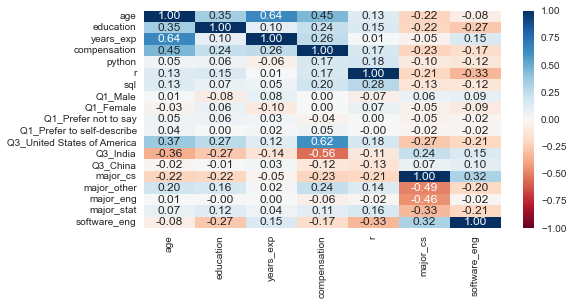

In [13]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 4))

sns.heatmap(X_train
.assign(software_eng=y_train)
.corr(method='spearman')
.loc[:, ['age','education', 'years_exp', 'compensation', 'r',
'major_cs', 'software_eng']],
cmap='RdBu', annot=True, fmt='.2f', vmin=-1, vmax=1, ax=ax
);

The correlation between `years_exp` and `education` is close to 0.10. We will use a scatter plot to tease out the possibility of a non-linear relationship between them.

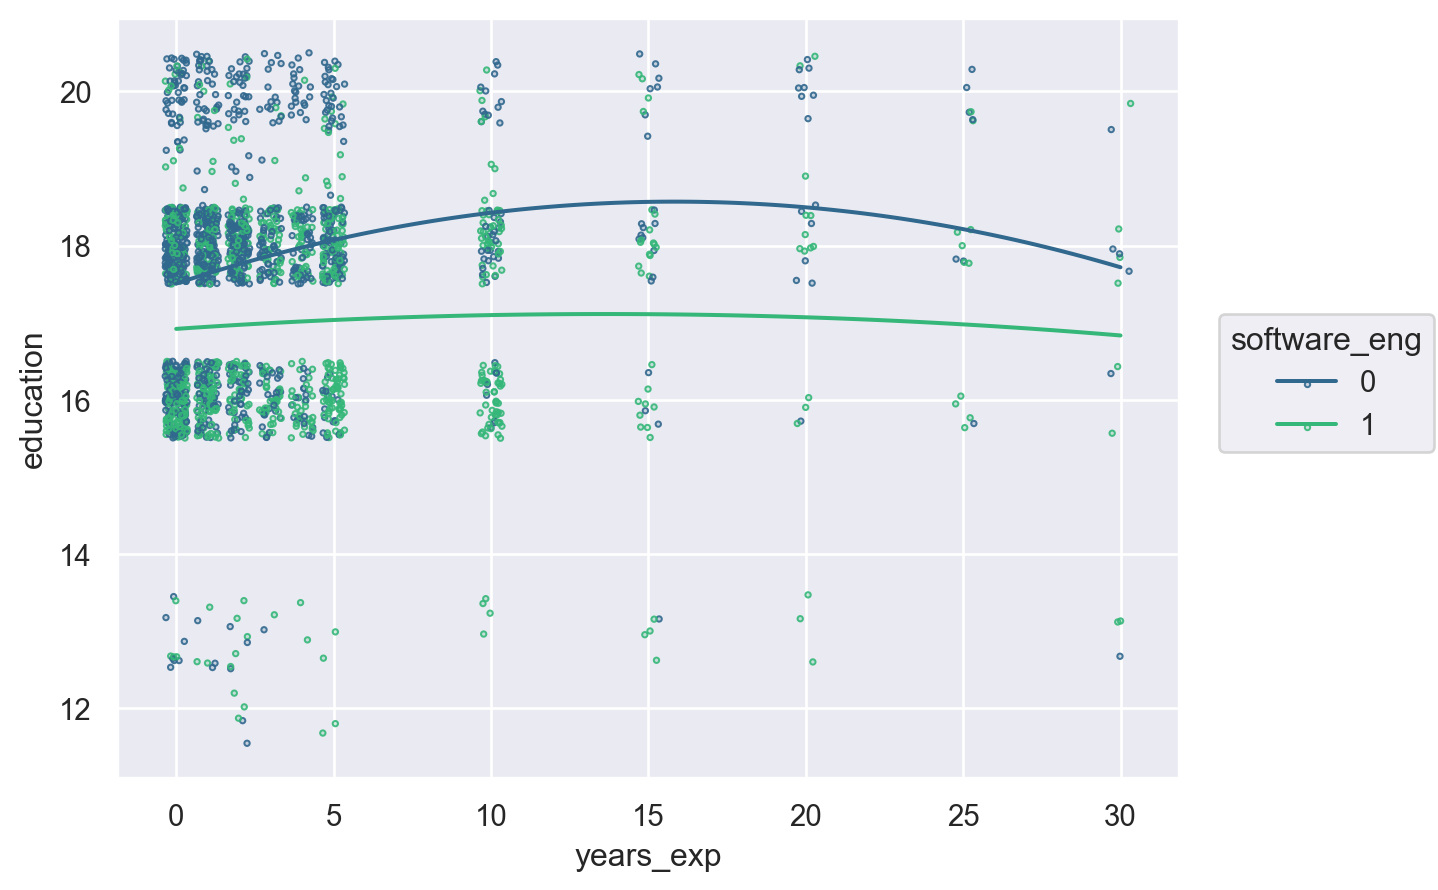

<Figure size 576x288 with 0 Axes>

In [24]:
import seaborn.objects as so

fig = plt.figure(figsize=(8, 4))

(so.Plot(X_train.assign(software_eng=y_train), 
         x='years_exp', y='education', 
         color='software_eng')
 .add(so.Dots(alpha=.9, pointsize=2), so.Jitter(x=.7, y=1))
 .add(so.Line(), so.PolyFit()).scale(color='viridis')
 #.on(fig) # not required unless saving to image
 .plot() # ditto
)

From the output above, it would seem like the education levels for software engineers are lower than for data scientists.

Now, let’s explore the relationships between major_cs and R and the target label. This has
three dimensions of categorical data. We can use Pandas grouping or the `pd.crosstab` shortcut
to quantify this:


Here is a step-by-step explanation of what this code does:

1. `X_train.assign(software_eng=y_train)` adds a new column to the `X_train` DataFrame, named `software_eng`, with the values from `y_train`.

2. `.groupby(['software_eng', 'r', 'major_cs'])` groups the resulting DataFrame by the values in the `software_eng`, `r`, and `major_cs` columns.

3. `.age.count()` calculates the count of rows in each group.

4. `.unstack().unstack()` reshapes the resulting Series into a multi-level table, with the levels of the index corresponding to the grouping columns.

5. `)` displays the resulting table.

Overall, this code snippet calculates the count of rows in a Pandas DataFrame grouped by several columns and displays the result as a multi-level table.

In [25]:
print(X_train
.assign(software_eng=y_train)
.groupby(['software_eng', 'r', 'major_cs'])
 .age
 .count()
 .unstack()
 .unstack()
)

major_cs        0         1     
r               0    1    0    1
software_eng                    
0             410  390  243  110
1             308   53  523   73


This shows that if the user didn’t use R, they have a higher probability of being a software
engineer.

Here is the pd.crosstab version:


Here is a step-by-step explanation of what this code does:

1. `both = (X_train.assign(software_eng=y_train))` adds a new column to the `X_train` DataFrame, named `software_eng`, with the values from `y_train`, and assigns the resulting DataFrame to the variable `both`.

2. `pd.crosstab(index=both.software_eng, columns=[both.major_cs, both.r])` calculates a cross-tabulation of the `major_cs` and `r` columns in the `both` DataFrame, with the rows corresponding to the values in the `software_eng` column.

3. `)` displays the resulting table.

Overall, this code snippet calculates a cross-tabulation of two columns in a Pandas DataFrame and displays the result as a table.


In [26]:
both = (X_train
 .assign(software_eng=y_train)
)
print(pd.crosstab(index=both.software_eng, columns=[both.major_cs, both.r]))

major_cs        0         1     
r               0    1    0    1
software_eng                    
0             410  390  243  110
1             308   53  523   73


The plot displays the count of rows in a Pandas DataFrame grouped by several columns as a stacked bar chart.

Here is a step-by-step explanation of what this code does:

1. `fig, ax = plt.subplots(figsize=(8, 4))` creates a new figure and axes with the specified size.

2. `grey = '#999999'`, `blue = '#16a2c6'`, and `font = 'Roboto'` define some variables that will be used later to customize the appearance of the plot.

3. `data = (X_train.assign(software_eng=y_train).groupby(['software_eng', 'r', 'major_cs']).age.count().unstack().unstack())` calculates the count of rows in the `X_train` DataFrame grouped by the values in the `software_eng`, `r`, and `major_cs` columns, and assigns the resulting table to the variable `data`.

4. `(data.pipe(lambda adf: adf.iloc[:,-2:].plot(color=[grey,blue], linewidth=4, ax=ax, legend=None) and adf).plot(color=[grey, blue, grey, blue], ax=ax, legend=None))` creates a stacked bar chart using the data in the `data` DataFrame. The bars are colored using the specified colors and have no legend.

5. `ax.set_xticks([0, 1], ['Data Scientist', 'Software Engineer'], font=font, size=12, weight=600)` sets the x-tick labels to `'Data Scientist'` and `'Software Engineer'`.

6. `ax.set_yticks([])` removes the y-tick labels.

7. `ax.set_xlabel('')` removes the x-axis label.

8. `ax.text(x=0, y=.93, s="Count Data Scientist or Software Engineer by R/CS", transform=fig.transFigure, ha='left', font=font, fontsize=10, weight=1000)` adds a title to the plot.

9. `ax.text(x=0, y=.83, s="(Studied CS) Thick lines\n(R) Blue", transform=fig.transFigure, ha='left', font=font, fontsize=10, weight=300)` adds a legend to the plot.

10. `for side in 'left,top,right,bottom'.split(','): ax.spines[side].set_visible(False)` removes the borders of the plot.

11. The two for loops at the end add labels to the bars of the chart.

Overall, this code snippet creates a plot using the Matplotlib library that displays the count of rows in a Pandas DataFrame grouped by several columns as a stacked bar chart.

findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.


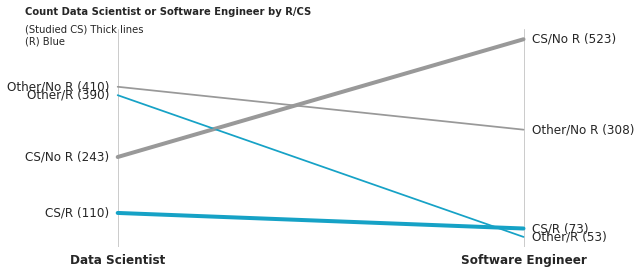

In [28]:
fig, ax = plt.subplots(figsize=(8, 4))
grey = '#999999'
blue = '#16a2c6'
font = 'Roboto'

data = (X_train
 .assign(software_eng=y_train)
 .groupby(['software_eng', 'r', 'major_cs'])
 .age
 .count()
 .unstack()
 .unstack())

(data
 .pipe(lambda adf: adf.iloc[:,-2:].plot(color=[grey,blue], linewidth=4, ax=ax,
 legend=None) and adf)
 .plot(color=[grey, blue, grey, blue], ax=ax, legend=None)
)

ax.set_xticks([0, 1], ['Data Scientist', 'Software Engineer'], font=font, size=12, weight=600)
ax.set_yticks([])
ax.set_xlabel('')
ax.text(x=0, y=.93, s="Count Data Scientist or Software Engineer by R/CS", transform=fig.transFigure, ha='left', font=font, fontsize=10, weight=1000)
ax.text(x=0, y=.83, s="(Studied CS) Thick lines\n(R) Blue", transform=fig.transFigure, ha='left', font=font, fontsize=10, weight=300)

for side in 'left,top,right,bottom'.split(','):
    ax.spines[side].set_visible(False)
    
# labels
for left,txt in zip(data.iloc[0], ['Other/No R', 'Other/R', 'CS/No R', 'CS/R']):
    ax.text(x=-.02, y=left, s=f'{txt} ({left})', ha='right', va='center', font=font, weight=300)
for right,txt in zip(data.iloc[1], ['Other/No R', 'Other/R', 'CS/No R', 'CS/R']):
    ax.text(x=1.02, y=right, s=f'{txt} ({right})', ha='left', va='center', font=font, weight=300)

## 18.3 Deeper Interactions

We can get interactions with three columns from the _Interaction Depth 2_ sheet.

In [29]:
print(pd.read_excel('fir.xlsx', sheet_name='Interaction Depth 2').iloc[:20]
 .sort_values(by='Average Rank')
 .head(5)
)

                         Interaction         Gain  FScore    wFScore  \
0               major_cs|r|years_exp  1842.711400      17   3.218940   
7            age|education|years_exp   267.537988      53   8.216888   
13        age|compensation|education   154.313243      55  15.013424   
2   compensation|education|years_exp   431.541351      91   8.997655   
14             education|r|years_exp   145.534593      17   2.879716   

    Average wFScore  Average Gain  Expected Gain  Gain Rank  FScore Rank  \
0          0.189349    108.394788     409.261203          1           34   
7          0.155036      5.047887      30.267047          8            8   
13         0.272971      2.805695      17.358738         14            7   
2          0.098875      4.742213      40.322039          3            2   
14         0.169395      8.560858      34.975379         15           35   

    wFScore Rank  Avg wFScore Rank  Avg Gain Rank  Expected Gain Rank  \
0             15                19   

## 18.4 Specifying Feature Interactions

The XGBoost library can limit feature interactions. This means that users can specify which features are allowed to interact with each other, potentially leading to models that are more robust, simpler, or comply with regulations. The text provides an example of how to take the top entries from the interactions and put them in a nested list, where each entry shows which groups of columns are able to follow other columns in a given tree.

According to the XGBoost documentation, feature interaction constraints allow users to decide which variables are allowed to interact and which are not. Potential benefits include better predictive performance from focusing on interactions that work, less noise in predictions, better generalization, and more control to the user on what the model can fit ¹. Additionally, it is simple to enforce feature interaction constraints in XGBoost by adding a single parameter.

We will take the top entries from the interactions and put them in a nested list. Each entry
in this list shows which groups of columns are able to follow other columns in a given tree.
For example, _education_ is in the first, third, and fourth lists. This means that _education_ can be
followed by _years_exp_, _compensation_, or _age columns_, but not the remaining columns.

This code snippet defines a list of lists named `constraints`, where each inner list represents a group of columns that are allowed to interact with each other in an XGBoost model. The `flatten` function is then defined, which takes a nested sequence as input and returns a flattened version of that sequence, where all nested elements are extracted and added to a single, one-dimensional list.

The `flatten` function is then called on the `constraints` list, and the resulting flattened list is passed to the `set` function to remove any duplicate elements. The resulting set is then sorted and converted back to a list, which is assigned to the variable `small_cols`. Finally, the `small_cols` list is printed.

In summary, this code snippet defines a list of feature interaction constraints for an XGBoost model, flattens the list of constraints, removes any duplicate elements, sorts the resulting list of unique elements, and then prints the resulting list of column names.

In [30]:
constraints = [['education', 'years_exp'], ['major_cs', 'r'],
['compensation', 'education'], ['age', 'education'],
['major_cs', 'years_exp'], ['age', 'years_exp'],
['age', 'compensation'], ['major_stat', 'years_exp'],
]

In [31]:
def flatten(seq):
    res = []
    for sub in seq:
        res.extend(sub)
    return res

small_cols = sorted(set(flatten(constraints)))

print(small_cols)

['age', 'compensation', 'education', 'major_cs', 'major_stat', 'r', 'years_exp']


The selected text is a code snippet that shows how to create an XGBoost classifier with interaction constraints, fit the model to training data, and evaluate its performance on test data.

First, an instance of the `XGBClassifier` class is created with the `interaction_constraints` parameter set to `constraints`, which is a list of lists representing the groups of columns that are allowed to interact with each other in the model. This classifier is assigned to the variable `xg_constraints`.

Next, the `fit` method is called on the `xg_constraints` classifier with the training data `X_train` and labels `y_train` as arguments. The `loc` method is used to select only the columns specified in the `small_cols` list from the training data. This fits the XGBoost classifier to the training data while enforcing the specified interaction constraints.

Finally, the `score` method is called on the fitted `xg_constraints` classifier with the test data `X_test` and labels `y_test` as arguments. Again, the `loc` method is used to select only the columns specified in the `small_cols` list from the test data. This returns the mean accuracy of the classifier on the given test data and labels.

In summary, this code snippet shows how to create an XGBoost classifier with interaction constraints, fit it to training data, and evaluate its performance on test data.

In [32]:
xg_constraints = xgb.XGBClassifier(interaction_constraints=constraints)
xg_constraints.fit(X_train.loc[:, small_cols], y_train)
xg_constraints.score(X_test.loc[:, small_cols], y_test)

0.7259668508287292

It looks like this model does ok when it uses 7 of the 18 features. But it does not exhibit
better performance than the default model (.745) trained on all of the data.
Here is a visualization of the first tree. You can see that the `r` column is only following by
`major_cs` in this tree.


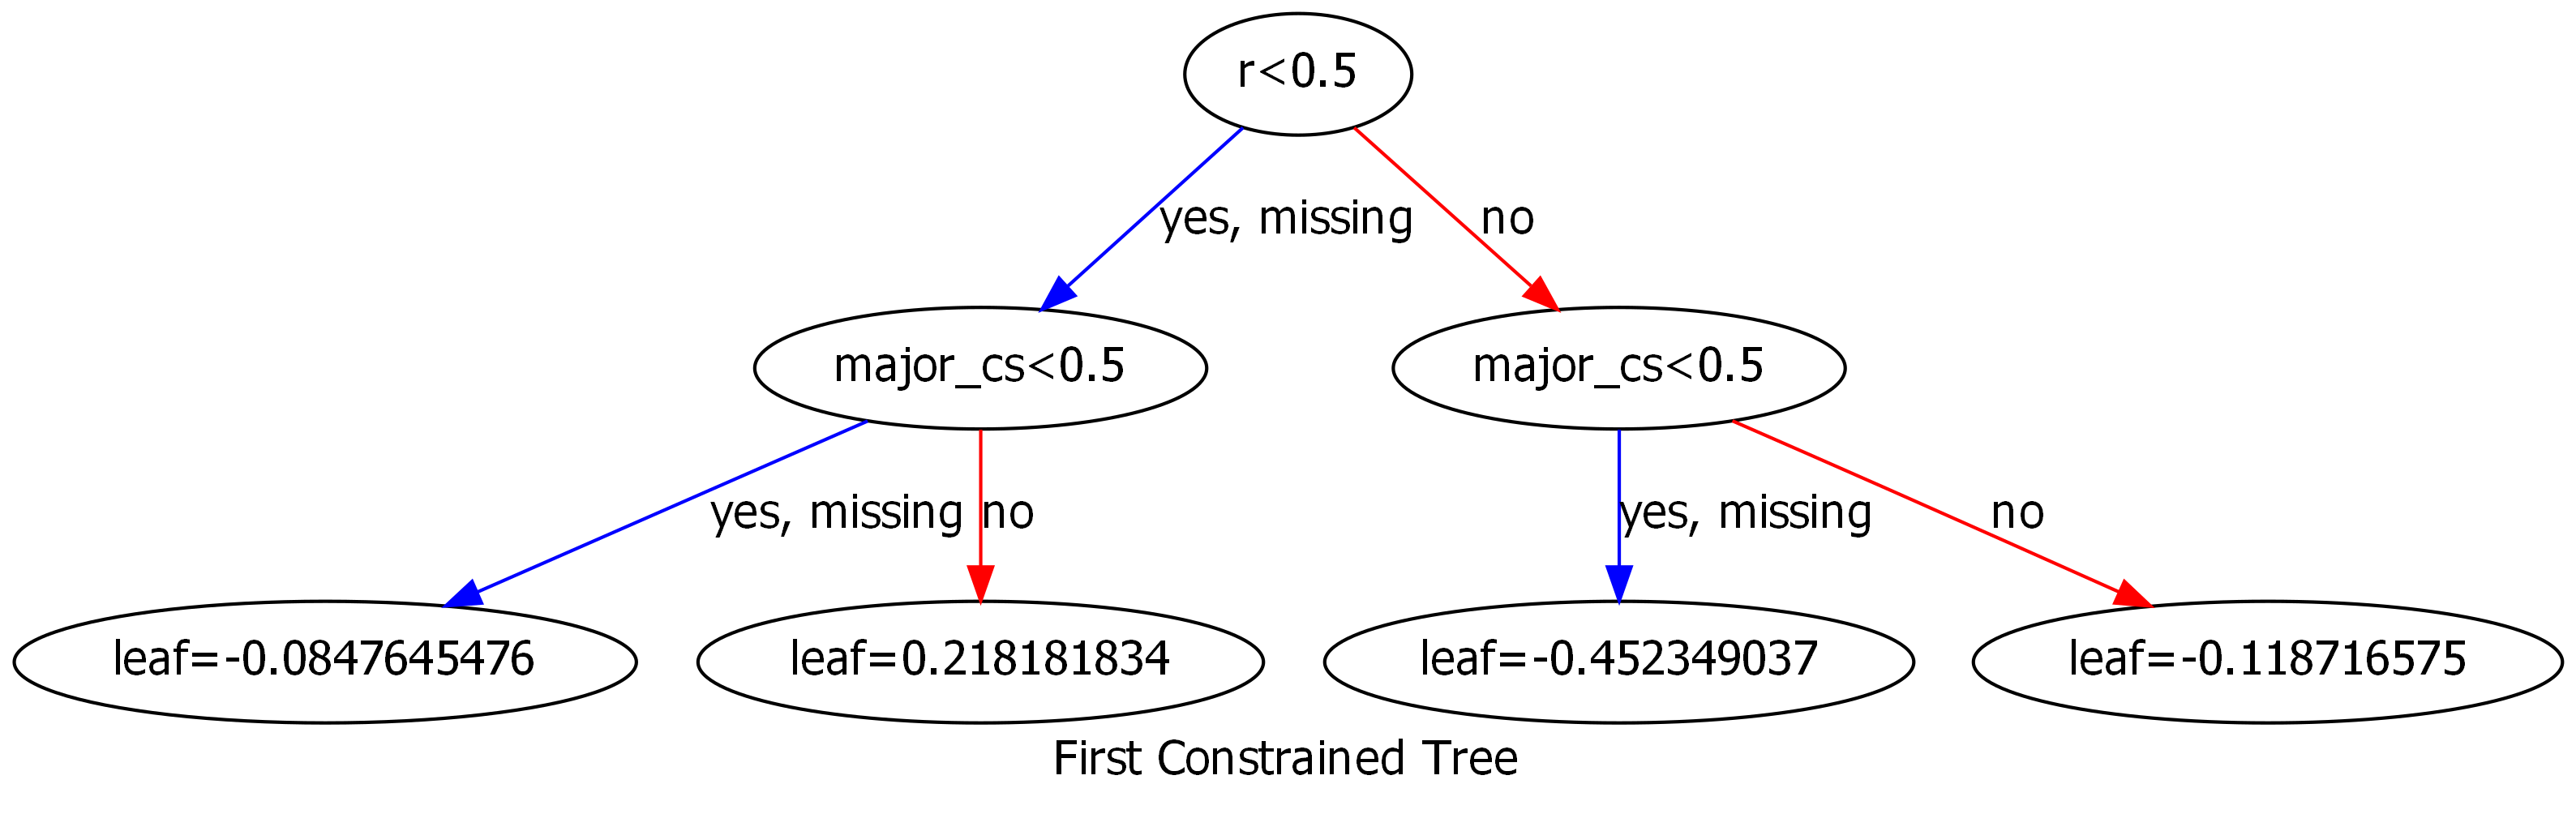

In [33]:
my_image_export(xg_constraints, n_trees=0, filename='img/constrains0_xg.dot', title='First Constrained Tree')


## Summary

- An interaction in a machine learning model refers to the combined effect of two or more features on the target variable. In other words, the effect of one feature on the target variable depends on the value of another feature.
- The xgbfir library is a XGBoost model dump parser, which ranks features as well as feature interactions by different metrics. It is used to analyze and understand the importance of features and their interactions in an XGBoost model.
- The Average Rank column in the xgbfir library is calculated by taking the average rank of a feature across all trees in the XGBoost model.
- The purpose of the Interaction Depth 1 sheet in the xgbfir library is to show the top feature interactions of depth 1 (i.e., pairwise interactions between two features) ranked by different metrics such as Gain, FScore, wFScore, etc.
- The xgbfir library can be used to find the top feature interactions in an XGBoost model by parsing the model dump and ranking feature interactions by different metrics. The top interactions can then be analyzed to gain insights into how features interact with each other and affect the target variable.
- The purpose of using interaction constraints in a machine learning model is to restrict the possible interactions between features. This can be useful when domain knowledge suggests that certain interactions are not meaningful or when interpretability is important.
- The potential drawbacks of using interaction constraints in a machine learning model include reduced flexibility and potentially reduced predictive performance if important interactions are excluded.
